In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Find Missing Value

In [3]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
[i for i in df.columns if df[i].isnull().sum() > 0]


['Cuisines']

<Axes: >

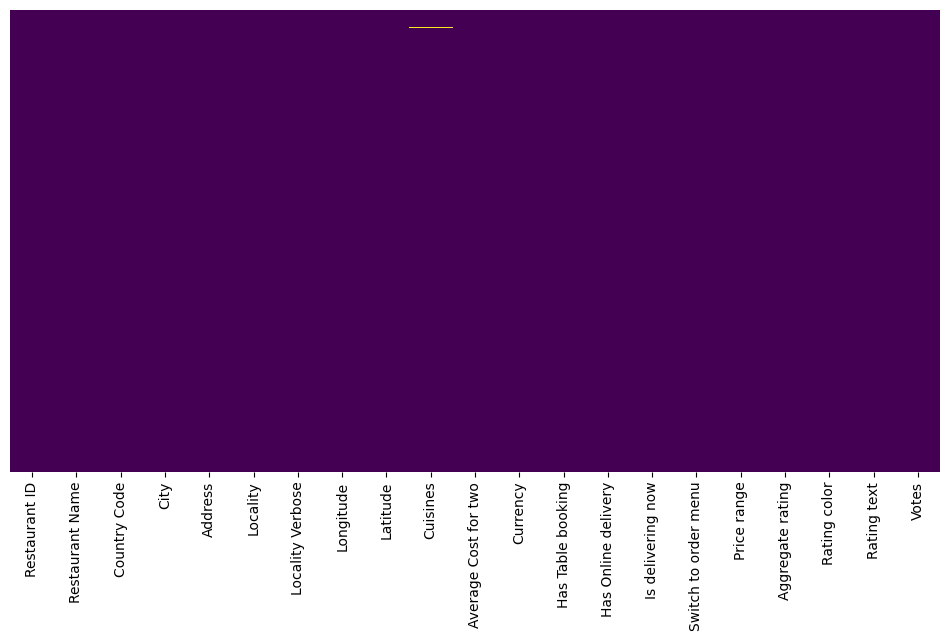

In [109]:
sn.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap='viridis')

In [9]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [22]:
final_df= pd.merge(df,df_country,on = 'Country Code',how = 'left')
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [78]:
country_names=final_df.Country.value_counts().index
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')


In [62]:
a = final_df['Country'].value_counts()

([<matplotlib.patches.Wedge at 0x1efbf8bfd90>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

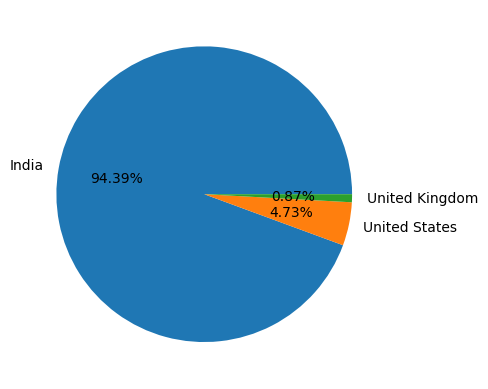

In [74]:
#Pie Chart
plt.pie(a[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation:Maximum order are from India,UK,US

In [189]:
ratings = final_df.groupby(by=['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,white,Not rated,2148
1,1.8,white,Poor,1
2,1.9,white,Poor,2
3,2.0,white,Poor,7
4,2.1,white,Poor,15
5,2.2,white,Poor,27
6,2.3,white,Poor,47
7,2.4,white,Poor,87
8,2.5,white,Average,110
9,2.6,white,Average,191


##Observation:
1) Rating 4.4 - 4.9 ,It is Excellent
2) Rating 4.0 - 4.4 ,It is Very Good
3) Rating 3.5-3.9 ,It is Good
4) Rating 2.5 - 3.4 ,It is Average
5)Rating 1.8 - 2.4 ,It is Poor
6) Rating 0 ,No Rating

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

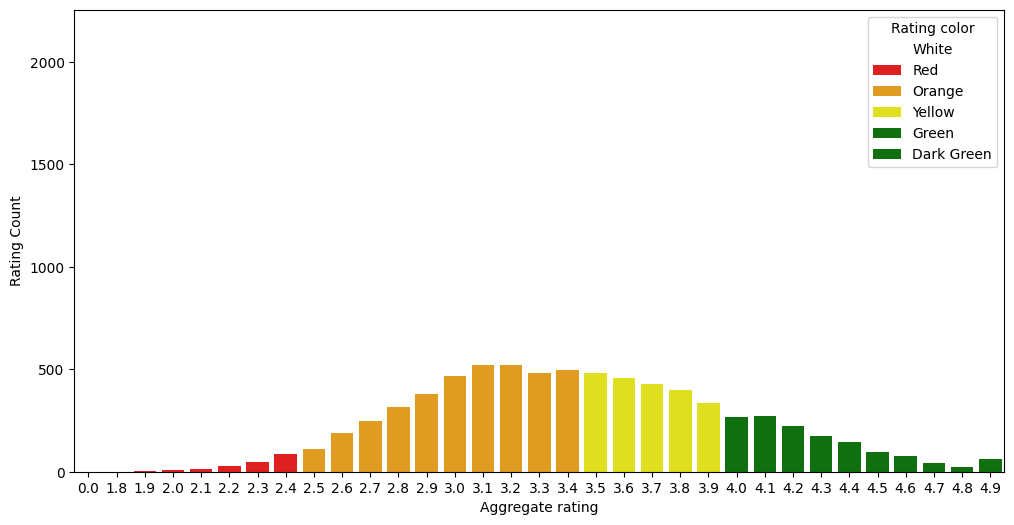

In [119]:

plt.rcParams['figure.figsize']=(12,6)
sn.barplot(data=ratings, x='Aggregate rating',y='Rating Count',hue='Rating color',palette=['white','red','orange','yellow','green','green'])

C:\Users\Niharika\AppData\Local\Temp\ipykernel_37424\1382967930.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(data = ratings,x='Rating color',palette=['blue','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

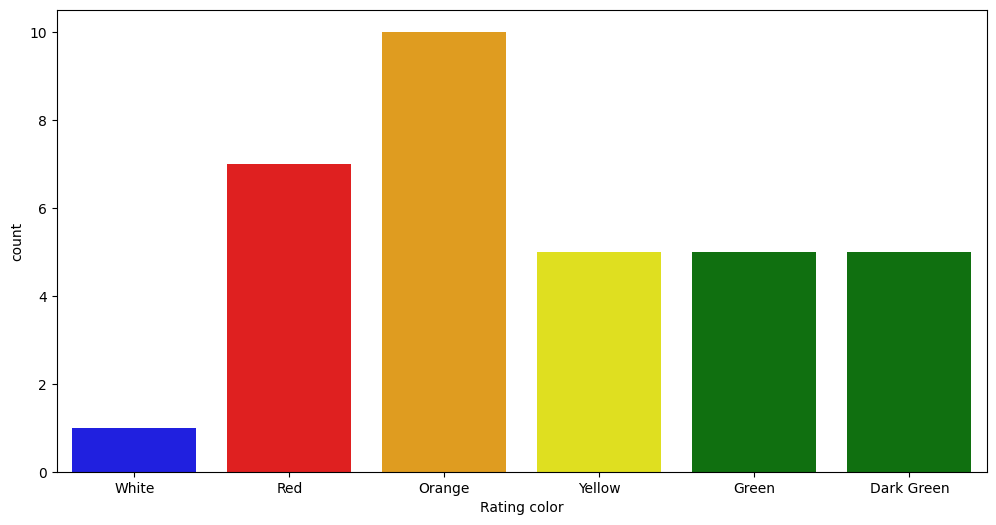

In [123]:
sn.countplot(data = ratings,x='Rating color',palette=['blue','red','orange','yellow','green','green'])

In [148]:
final_df['Rating color']

0       white
1       white
2       white
3       white
4       white
        ...  
9546    white
9547    white
9548    white
9549    white
9550    white
Name: Rating color, Length: 9551, dtype: object

In [153]:
final_df[final_df['Rating color']== 'white'].groupby('Country').size().reset_index()

,Country,0
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,8652
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [157]:
final_df.groupby(by =['Has Online delivery','Country']).size()

Has Online delivery  Country       
No                   Australia           24
                     Brazil              60
                     Canada               4
                     India             6229
                     Indonesia           21
                     New Zealand         40
                     Phillipines         22
                     Qatar               20
                     Singapore           20
                     South Africa        60
                     Sri Lanka           20
                     Turkey              34
                     UAE                 32
                     United Kingdom      80
                     United States      434
Yes                  India             2423
                     UAE                 28
dtype: int64

In [167]:
## Top 10 cuisines
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [201]:
sample1=final_df.groupby(by=['Cuisines','Aggregate rating']).size()
sample1

Cuisines                                   Aggregate rating
Afghani                                    0.0                 3
                                           2.9                 1
Afghani, Mughlai, Chinese                  0.0                 1
Afghani, North Indian                      0.0                 1
Afghani, North Indian, Pakistani, Arabian  0.0                 1
                                                              ..
Western, Asian, Cafe                       4.2                 1
Western, Fusion, Fast Food                 3.2                 1
World Cuisine                              4.9                 1
World Cuisine, Mexican, Italian            4.4                 1
World Cuisine, Patisserie, Cafe            4.2                 1
Length: 3924, dtype: int64

In [197]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [198]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,white,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,white,Excellent,591,Phillipines


In [ ]:
# Find out top 10 cuisines